# single

In [60]:
from src.adtk.data import validate_series
import pandas as pd

s = pd.read_csv('./data/IoT_Fridge.csv',usecols=['date', 'time','fridge_temperature'], parse_dates=True, squeeze=True)
# s = pd.read_csv('./data/IoT_Fridge.csv',usecols=['date', 'time','fridge_temperature'], index_col="time", parse_dates=True, squeeze=True)
# s = validate_series(s)

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\3018485404.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./data/IoT_Fridge.csv',usecols=['date', 'time','fridge_temperature'], parse_dates=True, squeeze=True)


In [61]:
s["ls"] = s.iloc[:,0:2].values.tolist()
s

,date,time,fridge_temperature,ls
0,31-Mar-19,12:36:52,13.10,"[31-Mar-19, 12:36:52 ]"
1,31-Mar-19,12:36:53,8.65,"[31-Mar-19, 12:36:53 ]"
2,31-Mar-19,12:36:54,2.00,"[31-Mar-19, 12:36:54 ]"
3,31-Mar-19,12:36:55,4.80,"[31-Mar-19, 12:36:55 ]"
4,31-Mar-19,12:36:56,10.70,"[31-Mar-19, 12:36:56 ]"
...,...,...,...,...
587071,27-Apr-19,12:41:17,4.00,"[27-Apr-19, 12:41:17 ]"
587072,27-Apr-19,12:41:17,6.05,"[27-Apr-19, 12:41:17 ]"
587073,27-Apr-19,12:41:17,12.80,"[27-Apr-19, 12:41:17 ]"
587074,27-Apr-19,12:41:18,6.50,"[27-Apr-19, 12:41:18 ]"


In [38]:
s['ls'][0]

['31-Mar-19', '   12:36:52   ']

In [62]:
i = 0
for item in s['ls']:
    s['ls'][i] = item[0] +' '+ item[1]
    i += 1
s

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\1656562921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ls'][i] = item[0] +' '+ item[1]


,date,time,fridge_temperature,ls
0,31-Mar-19,12:36:52,13.10,31-Mar-19 12:36:52
1,31-Mar-19,12:36:53,8.65,31-Mar-19 12:36:53
2,31-Mar-19,12:36:54,2.00,31-Mar-19 12:36:54
3,31-Mar-19,12:36:55,4.80,31-Mar-19 12:36:55
4,31-Mar-19,12:36:56,10.70,31-Mar-19 12:36:56
...,...,...,...,...
587071,27-Apr-19,12:41:17,4.00,27-Apr-19 12:41:17
587072,27-Apr-19,12:41:17,6.05,27-Apr-19 12:41:17
587073,27-Apr-19,12:41:17,12.80,27-Apr-19 12:41:17
587074,27-Apr-19,12:41:18,6.50,27-Apr-19 12:41:18


In [69]:
k = s.drop('time',axis=1).drop('date',axis=1)
k.rename(columns={'ls': 'Time'}, inplace=True)
k.set_index('Time',inplace=True)
k

,fridge_temperature
Time,
31-Mar-19 12:36:52,13.10
31-Mar-19 12:36:53,8.65
31-Mar-19 12:36:54,2.00
31-Mar-19 12:36:55,4.80
31-Mar-19 12:36:56,10.70
...,...
27-Apr-19 12:41:17,4.00
27-Apr-19 12:41:17,6.05
27-Apr-19 12:41:17,12.80


In [58]:
k = k.drop('29-Apr-190:00:03',axis=0)

In [70]:
k.index = pd.to_datetime(k.index)
k

,fridge_temperature
Time,
2019-03-31 12:36:52,13.10
2019-03-31 12:36:53,8.65
2019-03-31 12:36:54,2.00
2019-03-31 12:36:55,4.80
2019-03-31 12:36:56,10.70
...,...
2019-04-27 12:41:17,4.00
2019-04-27 12:41:17,6.05
2019-04-27 12:41:17,12.80


In [71]:
k

,fridge_temperature
Time,
2019-03-31 12:36:52,13.10
2019-03-31 12:36:53,8.65
2019-03-31 12:36:54,2.00
2019-03-31 12:36:55,4.80
2019-03-31 12:36:56,10.70
...,...
2019-04-27 12:41:17,4.00
2019-04-27 12:41:17,6.05
2019-04-27 12:41:17,12.80


In [73]:
k.to_csv('./data/IoT_Fridge_single.csv')

In [87]:
s = pd.read_csv('./data/IoT_Fridge_single.csv', parse_dates=True, squeeze=True)
# s = validate_series(s)

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\279007007.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./data/IoT_Fridge_single.csv', parse_dates=True, squeeze=True)


In [88]:
s = s.sort_values('Time')
s['Time']=pd.to_datetime(s.Time)

In [89]:
s.set_index('Time',inplace=True)

In [90]:
s

,fridge_temperature
Time,
2019-03-31 12:36:52,13.10
2019-03-31 12:36:52,13.10
2019-03-31 12:36:53,8.65
2019-03-31 12:36:53,8.65
2019-03-31 12:36:54,2.00
...,...
2019-04-29 14:47:32,5.70
2019-04-29 14:47:34,10.40
2019-04-29 14:47:35,1.00


In [91]:
s = validate_series(s)

In [92]:
from src.adtk.visualization import plot
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD(c=3.0, side="both")
anomalies = seasonal_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2)

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.

In [105]:
delta = pd.period_range(start="2019-2-2", periods=587076,freq='1s')
delta

PeriodIndex(['2019-02-02 00:00:00', '2019-02-02 00:00:01',
             '2019-02-02 00:00:02', '2019-02-02 00:00:03',
             '2019-02-02 00:00:04', '2019-02-02 00:00:05',
             '2019-02-02 00:00:06', '2019-02-02 00:00:07',
             '2019-02-02 00:00:08', '2019-02-02 00:00:09',
             ...
             '2019-02-08 19:04:26', '2019-02-08 19:04:27',
             '2019-02-08 19:04:28', '2019-02-08 19:04:29',
             '2019-02-08 19:04:30', '2019-02-08 19:04:31',
             '2019-02-08 19:04:32', '2019-02-08 19:04:33',
             '2019-02-08 19:04:34', '2019-02-08 19:04:35'],
            dtype='period[S]', length=587076)

In [111]:
s = pd.read_csv('./data/IoT_Fridge_single.csv', parse_dates=True, squeeze=True)

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\3642708847.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./data/IoT_Fridge_single.csv', parse_dates=True, squeeze=True)


In [112]:
s['Time'] = delta

In [113]:
s

,Time,fridge_temperature
0,2019-02-02 00:00:00,13.10
1,2019-02-02 00:00:01,8.65
2,2019-02-02 00:00:02,2.00
3,2019-02-02 00:00:03,4.80
4,2019-02-02 00:00:04,10.70
...,...,...
587071,2019-02-08 19:04:31,4.00
587072,2019-02-08 19:04:32,6.05
587073,2019-02-08 19:04:33,12.80
587074,2019-02-08 19:04:34,6.50


In [120]:
i = 0
for item in s.Time:
    s.Time[i] = str(item)
    i += 1

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\4021951411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.Time[i] = str(item)


In [125]:
i = 0
s['Time1'] = None
for item in s.Time:
    s['Time1'][i] = str(item)
    i += 1

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\1682681799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Time1'][i] = str(item)


In [126]:
type(s.Time1[1])

str

In [127]:
s.Time1 = pd.to_datetime(s.Time1)

In [128]:
s.set_index('Time1',inplace=True)
s

,Time,fridge_temperature
Time1,,
2019-02-02 00:00:00,2019-02-02 00:00:00,13.10
2019-02-02 00:00:01,2019-02-02 00:00:01,8.65
2019-02-02 00:00:02,2019-02-02 00:00:02,2.00
2019-02-02 00:00:03,2019-02-02 00:00:03,4.80
2019-02-02 00:00:04,2019-02-02 00:00:04,10.70
...,...,...
2019-02-08 19:04:31,2019-02-08 19:04:31,4.00
2019-02-08 19:04:32,2019-02-08 19:04:32,6.05
2019-02-08 19:04:33,2019-02-08 19:04:33,12.80


In [134]:
s.drop('Time',axis=1,inplace=True)

In [135]:
s.to_csv('./data/IoT_Fridge_handle.csv')

In [171]:
s = pd.read_csv('./data/IoT_Fridge_handle.csv', index_col='Time1', parse_dates=True, squeeze=True)

C:\Users\YT\AppData\Local\Temp\ipykernel_18340\543537964.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./data/IoT_Fridge_handle.csv', index_col='Time1', parse_dates=True, squeeze=True)


In [5]:
from src.adtk.visualization import plot
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD(c=3.0, side="both")
anomalies = seasonal_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2)

KeyboardInterrupt: 

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


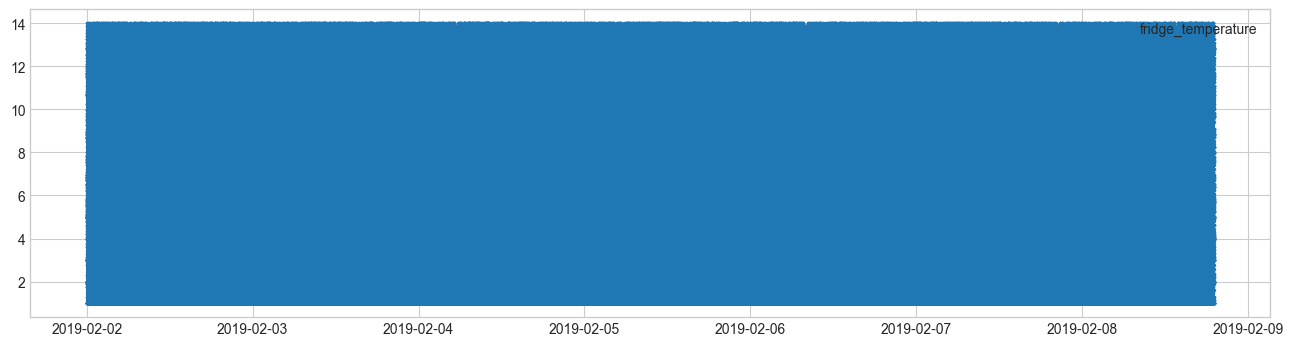

In [139]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0, side='positive')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')

In [141]:
s = s[:2000]

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


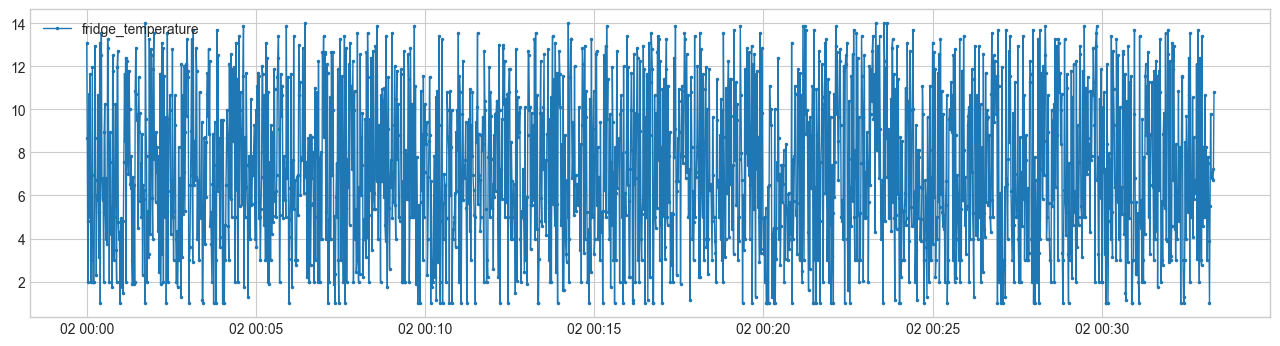

In [143]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0, side='positive')
persist_ad.window = 24
# anomalies = persist_ad.fit_detect(s)
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

[<AxesSubplot: >]

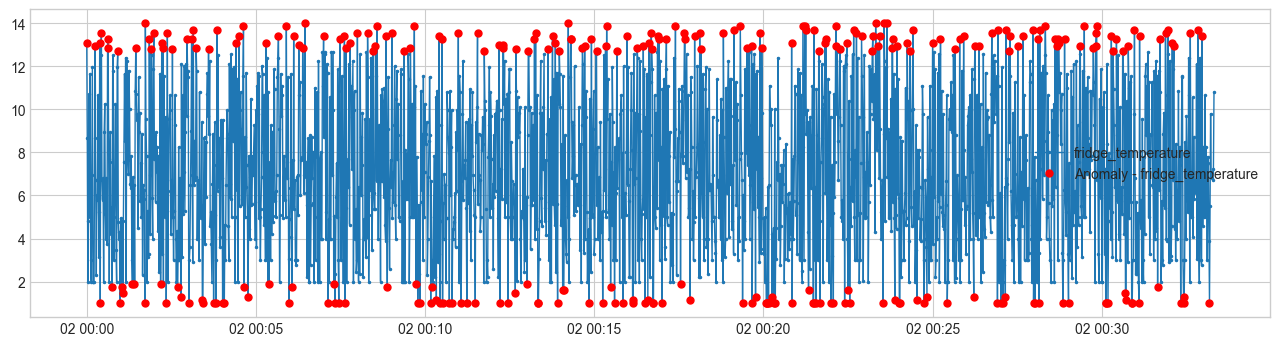

In [157]:
from adtk.detector import InterQuartileRangeAD

iqr_ad = InterQuartileRangeAD(c=0.4)
anomalies = iqr_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

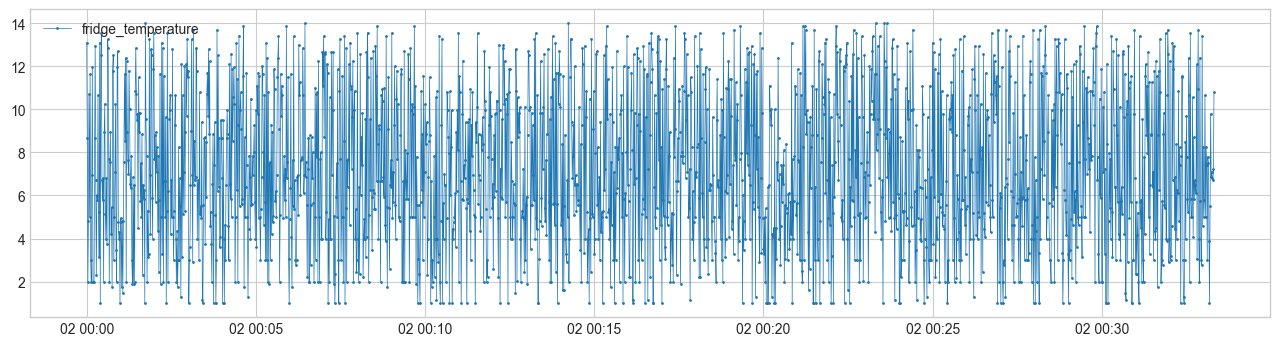

In [158]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red')

In [159]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)
anomalies = autoregression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2)

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.

[<AxesSubplot: >]

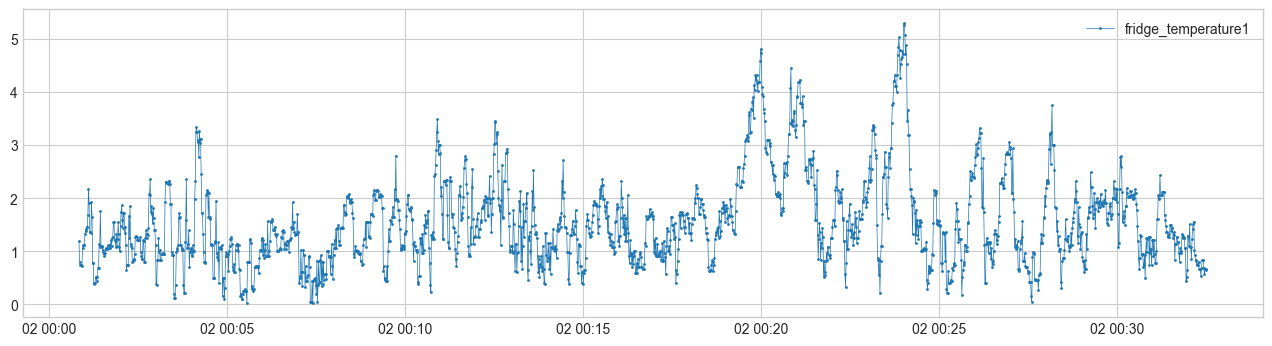

In [165]:
from adtk.transformer import DoubleRollingAggregate
s_transformed = DoubleRollingAggregate(
    agg="quantile",
    agg_params={"q": [0.1, 0.5, 0.9]},
    window=50,
    diff="l2").transform(s).rename(columns={'fridge_temperature': 'fridge_temperature1'})

plot(s_transformed)

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

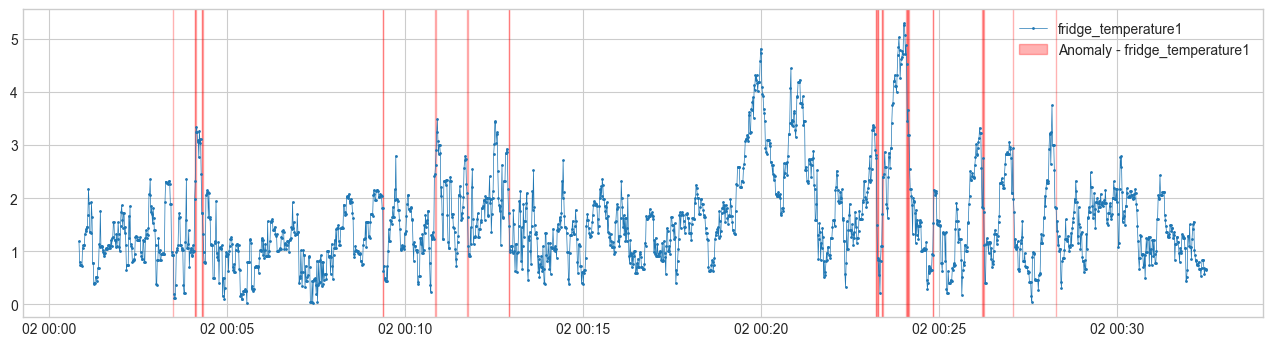

In [168]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=2.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(s_transformed)
plot(s_transformed, anomaly=anomalies, anomaly_color='red')

# Multi

In [29]:
from src.adtk.data import validate_series
import pandas as pd

s = pd.read_csv('./data/IoT_Modbus.csv',usecols=['FC1_Read_Input_Register','FC2_Read_Discrete_Value','FC3_Read_Holding_Register','FC4_Read_Coil'], parse_dates=True, squeeze=True)
s

C:\Users\YT\AppData\Local\Temp\ipykernel_21204\2180210354.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./data/IoT_Modbus.csv',usecols=['FC1_Read_Input_Register','FC2_Read_Input_Register'], parse_dates=True, squeeze=True)


ValueError: Usecols do not match columns, columns expected but not found: ['FC2_Read_Input_Register']

In [30]:
delta = pd.period_range(start="2019-2-2", periods=287194,freq='1s')
delta

PeriodIndex(['2019-02-02 00:00:00', '2019-02-02 00:00:01',
             '2019-02-02 00:00:02', '2019-02-02 00:00:03',
             '2019-02-02 00:00:04', '2019-02-02 00:00:05',
             '2019-02-02 00:00:06', '2019-02-02 00:00:07',
             '2019-02-02 00:00:08', '2019-02-02 00:00:09',
             ...
             '2019-02-05 07:46:24', '2019-02-05 07:46:25',
             '2019-02-05 07:46:26', '2019-02-05 07:46:27',
             '2019-02-05 07:46:28', '2019-02-05 07:46:29',
             '2019-02-05 07:46:30', '2019-02-05 07:46:31',
             '2019-02-05 07:46:32', '2019-02-05 07:46:33'],
            dtype='period[S]', length=287194)

In [27]:
s['Time'] = delta
i = 0
s['Time1'] = None
for item in s.Time:
    s['Time1'][i] = str(item)
    i += 1

In [4]:
s.Time1 = pd.to_datetime(s.Time1)
s.set_index('Time1', inplace=True)
s

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,Time
Time1,,,,,
2019-02-02 00:00:00,53287,1463,33518,23014,2019-02-02 00:00:00
2019-02-02 00:00:01,41029,55891,26004,50645,2019-02-02 00:00:01
2019-02-02 00:00:02,41029,55891,26004,50645,2019-02-02 00:00:02
2019-02-02 00:00:03,64661,40232,33460,44046,2019-02-02 00:00:03
2019-02-02 00:00:04,64661,40232,33460,44046,2019-02-02 00:00:04
...,...,...,...,...,...
2019-02-05 07:46:29,22798,40857,14335,58610,2019-02-05 07:46:29
2019-02-05 07:46:30,15838,54368,63613,45660,2019-02-05 07:46:30
2019-02-05 07:46:31,28674,60221,3792,17705,2019-02-05 07:46:31


In [5]:
s.drop('Time', axis=1, inplace=True)
s.to_csv('./data/IoT_Modbus_handle.csv')

In [12]:
s = s[:200]

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

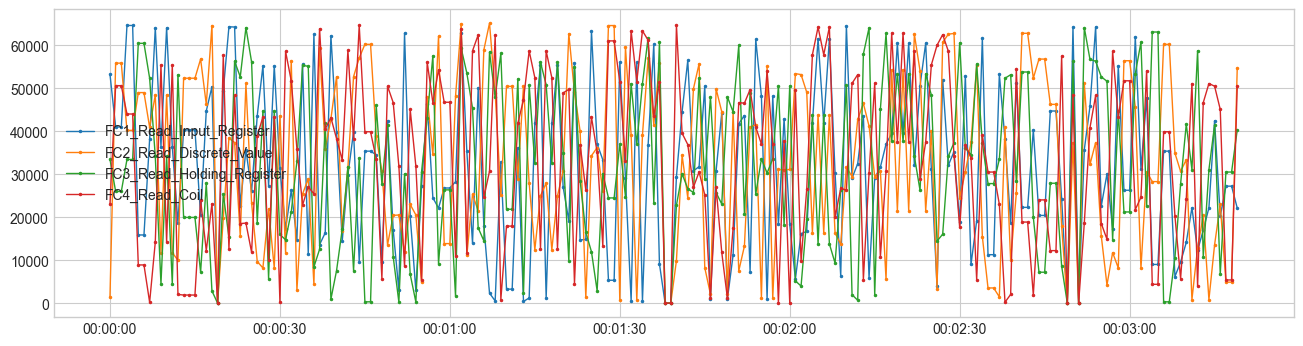

In [14]:
from adtk.detector import PcaAD
from src.adtk.visualization import plot
pca_ad = PcaAD(k=0.1)
anomalies = pca_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

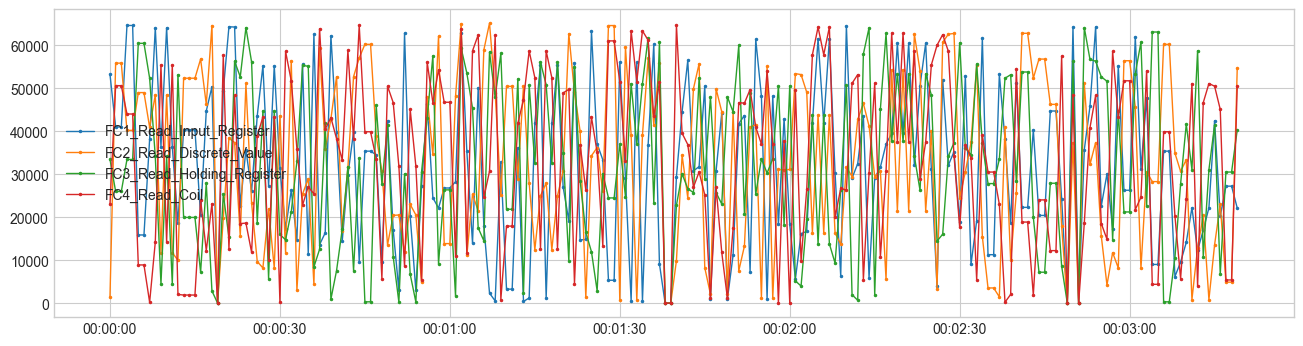

In [18]:
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
regression_ad = RegressionAD(regressor=LinearRegression(), target="FC1_Read_Input_Register", c=3)
anomalies = regression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

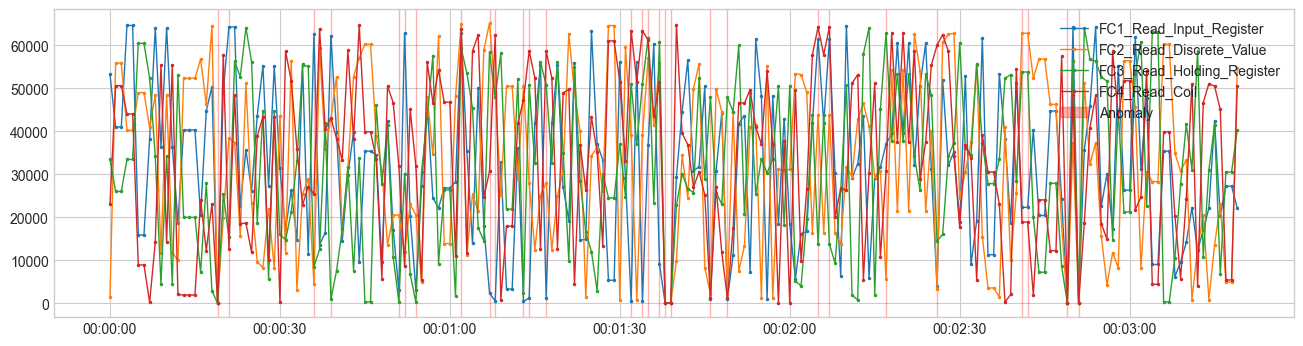

In [20]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.15))
anomalies = outlier_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

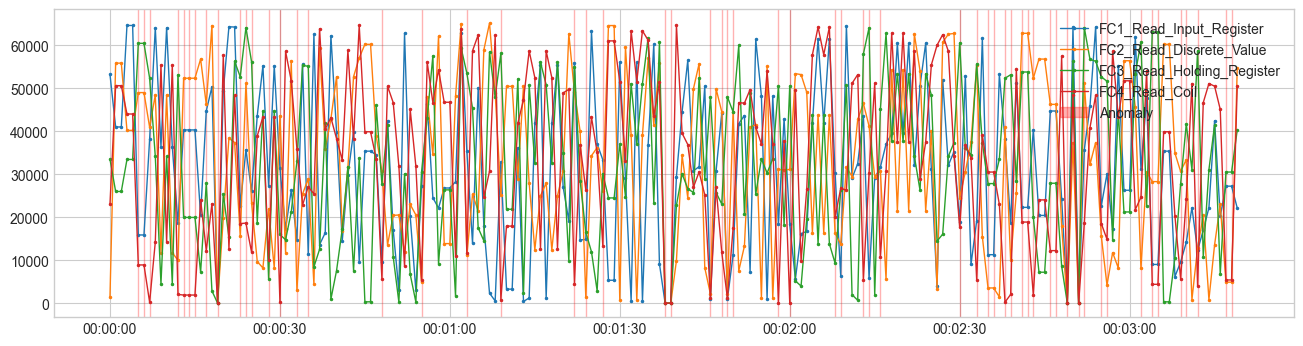

In [21]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

In [6]:
import pandas as pd

s = pd.read_csv('./data/IoT_Modbus_handle.csv',index_col='Time1', parse_dates=True, squeeze=True)
s

C:\Users\wuguo\AppData\Local\Temp\ipykernel_11460\3736576022.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./data/IoT_Modbus_handle.csv',index_col='Time1', parse_dates=True, squeeze=True)


,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
Time1,,,,
2019-02-02 00:00:00,53287,1463,33518,23014
2019-02-02 00:00:01,41029,55891,26004,50645
2019-02-02 00:00:02,41029,55891,26004,50645
2019-02-02 00:00:03,64661,40232,33460,44046
2019-02-02 00:00:04,64661,40232,33460,44046
...,...,...,...,...
2019-02-05 07:46:29,22798,40857,14335,58610
2019-02-05 07:46:30,15838,54368,63613,45660
2019-02-05 07:46:31,28674,60221,3792,17705


In [7]:
import numpy as np
noise = np.random.randn(287194)*5
noise

array([ 2.17057247,  0.16343357,  1.29725625, ...,  0.58051473,
       -4.78811908,  4.29261027])

In [8]:
i = 0

for item in s.FC1_Read_Input_Register:
    s['FC2_Read_Discrete_Value'][i] = item * 0.3 + noise[i]
    i += 1
s

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
Time1,,,,
2019-02-02 00:00:00,53287,15988.270572,33518,23014
2019-02-02 00:00:01,41029,12308.863434,26004,50645
2019-02-02 00:00:02,41029,12309.997256,26004,50645
2019-02-02 00:00:03,64661,19403.102822,33460,44046
2019-02-02 00:00:04,64661,19406.551090,33460,44046
...,...,...,...,...
2019-02-05 07:46:29,22798,6837.880709,14335,58610
2019-02-05 07:46:30,15838,4751.788955,63613,45660
2019-02-05 07:46:31,28674,8602.780515,3792,17705


In [9]:
i = 0
noise = np.random.randn(287194)*4
noise
for item in s.FC1_Read_Input_Register:
    s['FC3_Read_Holding_Register'][i] = item * 0.87 - noise[i]
    i += 1
s

C:\Users\wuguo\AppData\Local\Temp\ipykernel_11460\2494919204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['FC3_Read_Holding_Register'][i] = item * 0.87 - noise[i]


,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
Time1,,,,
2019-02-02 00:00:00,53287,15988.270572,46362.582460,23014
2019-02-02 00:00:01,41029,12308.863434,35695.680882,50645
2019-02-02 00:00:02,41029,12309.997256,35695.147250,50645
2019-02-02 00:00:03,64661,19403.102822,56259.373209,44046
2019-02-02 00:00:04,64661,19406.551090,56261.716677,44046
...,...,...,...,...
2019-02-05 07:46:29,22798,6837.880709,19831.626578,58610
2019-02-05 07:46:30,15838,4751.788955,13775.648460,45660
2019-02-05 07:46:31,28674,8602.780515,24954.343882,17705


In [10]:
i = 0
noise = np.random.randn(287194)*7
noise
for item in s.FC1_Read_Input_Register:
    s['FC4_Read_Coil'][i] = item * 1.17 - noise[i]
    i += 1
s

C:\Users\wuguo\AppData\Local\Temp\ipykernel_11460\2635982647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['FC4_Read_Coil'][i] = item * 1.17 - noise[i]


,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
Time1,,,,
2019-02-02 00:00:00,53287,15988.270572,46362.582460,62345.319334
2019-02-02 00:00:01,41029,12308.863434,35695.680882,47997.597604
2019-02-02 00:00:02,41029,12309.997256,35695.147250,48001.814569
2019-02-02 00:00:03,64661,19403.102822,56259.373209,75650.932473
2019-02-02 00:00:04,64661,19406.551090,56261.716677,75646.351415
...,...,...,...,...
2019-02-05 07:46:29,22798,6837.880709,19831.626578,26690.139975
2019-02-05 07:46:30,15838,4751.788955,13775.648460,18540.363811
2019-02-05 07:46:31,28674,8602.780515,24954.343882,33557.814547


D:\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

d:\pycharmprojects\adtk\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
d:\pycharmprojects\adtk\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


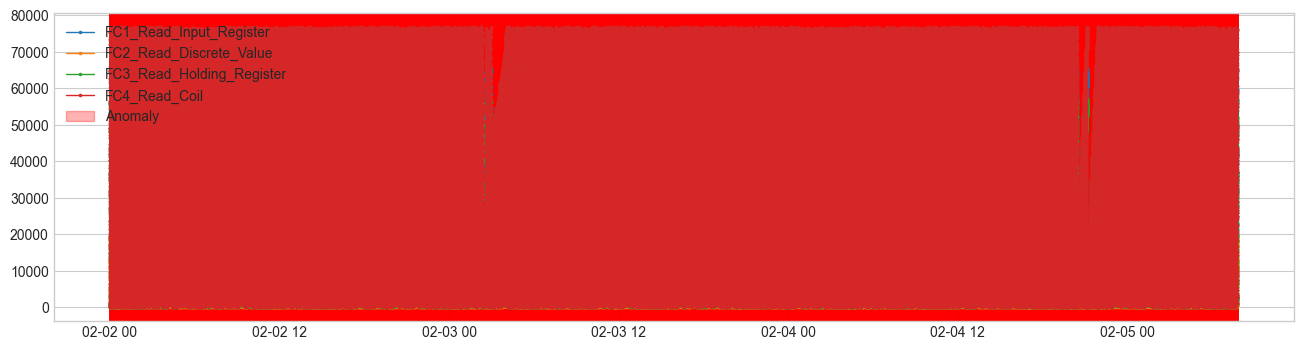

In [42]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

C:\Users\wuguo\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

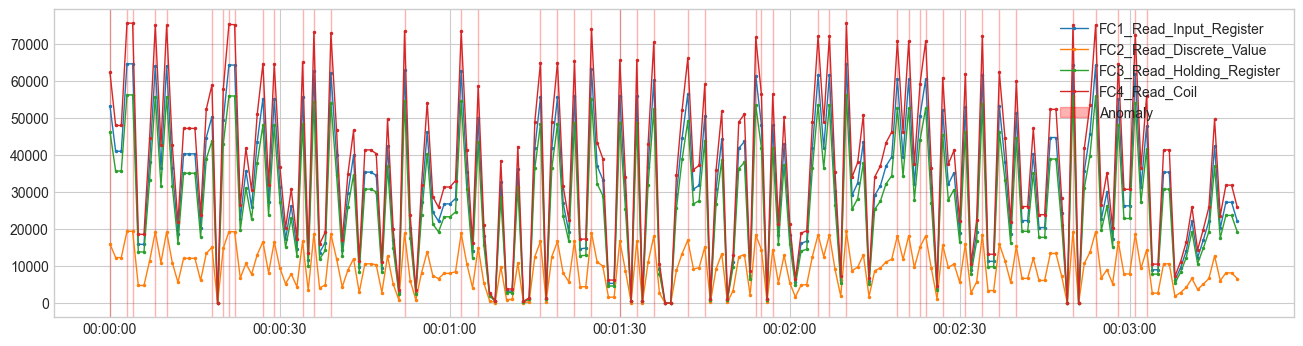

In [11]:
s1 = s[:200]
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

In [12]:
i = 0
for item in s1['FC2_Read_Discrete_Value']:
    if i > 40 and i < 75:
        s1.FC2_Read_Discrete_Value[i] = item + 23000
    i += 1

C:\Users\wuguo\AppData\Local\Temp\ipykernel_11460\2492440481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1.FC2_Read_Discrete_Value[i] = item + 23000


In [13]:
from src.adtk.visualization import plot
from adtk.detector import SeasonalAD

C:\Users\wuguo\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<AxesSubplot: >]

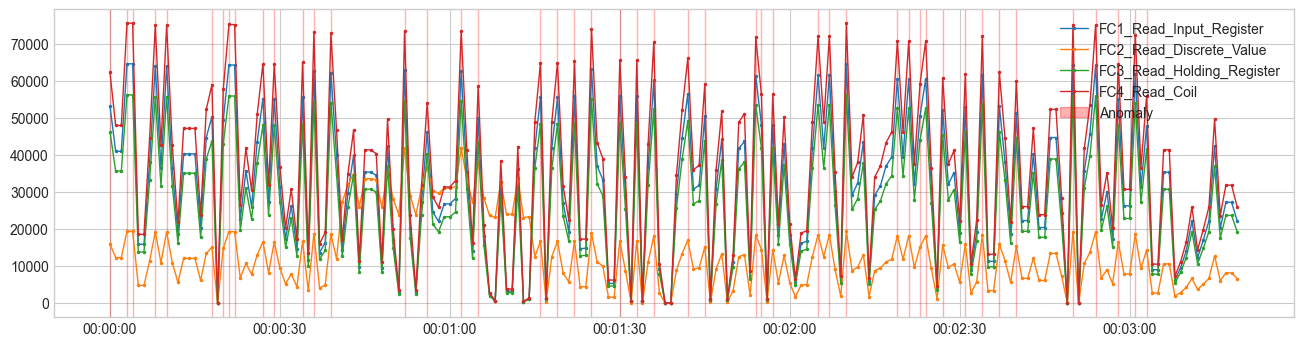

In [14]:
# s1 = s[:200]
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

C:\Users\wuguo\PycharmProjects\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


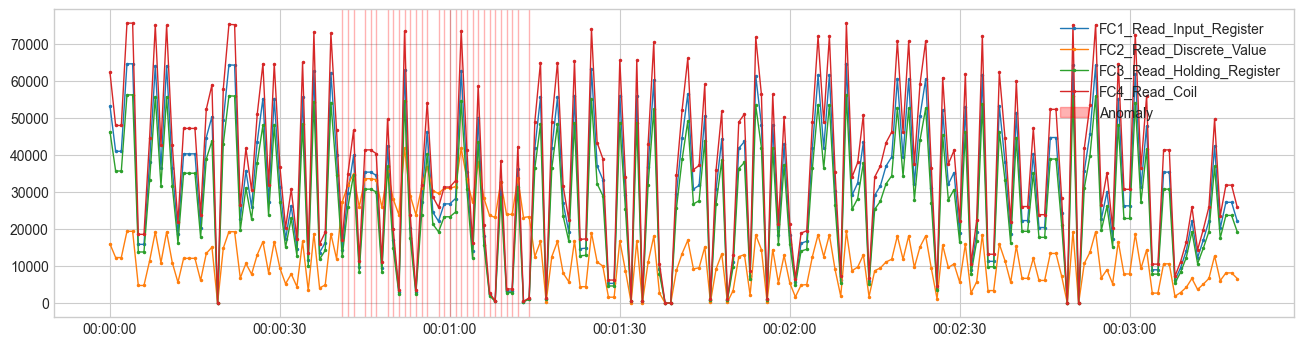

In [15]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.15))
anomalies = outlier_detector.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');